<a href="https://colab.research.google.com/github/Aayushmatkar/DataScienceApplications/blob/main/DTI_GROUP12_ASSIGNMENT_1(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Classification (Group Assignment 1)

Take five different samples of Gutenberg digital books (or your choice of text corpus), which are of five different authors, that you suspect are of the same genres and are semantically the same. For example, choose two of the books 1- The Brothers Karamazov and 2- Thus Spoke Zarathustra 3- Nausea.

Separate and set aside unbiased random partitions for training, validation and testing.

The overall objective is to produce classification predictions and compare them; analyze the pros and cons of algorithms and generate and communicate the insights.

 Gauge the bias and variability of the models to decide the champion model. Then play with the features and other factors that provide you with leverages to make it harder for the model to predict and bring the accuracy down for about 20% and then check the bias and variability using the overlay of different genre (drama, nonfiction, fiction (mystery, romance) ), author's world-view, gender, nationality, place of birth, education, or marital status etc.

Prepare the data: create random samples of 200 documents of each book, representative of the source input. Prepare the records of 100 words records for each document, label them as a, b and c etc. as per the book they belong to.

Preprocess the data: remove stop-words and garbage characters if needed.

Transform to BOW, and TF-IDF, n-gram, (LDA, word-embedding, optional) etc.

Train a machine that can tell which author (and genre), when asked!

Evaluation: Do ten-fold cross-validation.

Perform Error-Analysis: Identity what were the characteristics of the instance records that threw the machine off. Evaluate for the potential bias, author's or book's characteristics.

Document your steps, explain the results effectively, using graphs.

Verify and validate your programs; Make sure your programs run without syntax or logical errors.

Massage the data: Reduce the number of words per document if the accuracy is too high and then repeat the above steps.

#lib imports 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#MODEL IMPORTS
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#VALIDATION METRICS
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

#DATA PREPARATION AND CLEANING 

In [ ]:
import nltk
from nltk.corpus import gutenberg
import re
import os,random
import pandas as pd
nltk.download('punkt')
nltk.download('gutenberg')

def create_partitions(text, book_name, author):
    partitions = []
    words = nltk.word_tokenize(text)
    for i in range(0, len(words), 100):
        partitions.append((words[i:i+100], book_name, author))
    return partitions

#The books selected below are from the gutenberg module and are of the same genre 'novel'
book_names=['melville-moby_dick.txt','edgeworth-parents.txt','chesterton-thursday.txt','austen-emma.txt','milton-paradise.txt']

def random_sentences_with_book_name():
  result=pd.DataFrame(columns=['Text', 'Book Name','Author'])
  for i in book_names:
    # Splitting the book names to remove their 'txt' extension
    label_name=i.split('.')[0]

    # Getting the book names from Gutenberg and reading them
    book = gutenberg.raw(i)

    #Getting the book names and their respective authors
    lines = book.splitlines()

    #The first line consists information about the above comment
    line1=lines[0]
    
    #Removing the year from the line
    pattern = r'\D+'

    digits_removed = re.findall(pattern, line1)

    #Getting the author name
    author = re.search(r'\sby\s([\w\s\.]+)[\s\d{4}]+', digits_removed[0]).group(1)

    #Getting the book name
    book_name = re.search(r'\[([\w\s\']+)[\,]?\sby', line1).group(1)

    # Create partitions of 100 words each
    partitions = create_partitions(book, book_name, author)

    # Create 200 random samples of the partitions
    samples = random.sample(partitions, 200)

    # Using regular expressions to clean the data
    for i in range(len(samples)):
        samples[i] = (re.sub(r'[^\w\s]','', ' '.join(samples[i][0])), samples[i][1], samples[i][2])

    # Serialize the data using Pandas
    df = pd.DataFrame(samples, columns=['Text', 'Book Name','Author'])

    #Appending the random sentences of a book to the final dataframe 
    result=pd.concat([result,df])
  result.to_csv('book_partitions.csv', index=False)

  print("Data saved to book_partitions.csv.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [ ]:
random_sentences_with_book_name()
data=pd.read_csv('book_partitions.csv')
data['Author'].value_counts(),data['Author'].unique()
data['Book Name'].value_counts(),data['Book Name'].unique()

Data saved to book_partitions.csv.


(Moby Dick                   200
 The Parent's Assistant      200
 The Man Who Was Thursday    200
 Emma                        200
 Paradise Lost               200
 Name: Book Name, dtype: int64,
 array(['Moby Dick', "The Parent's Assistant", 'The Man Who Was Thursday',
        'Emma', 'Paradise Lost'], dtype=object))

In [ ]:
data['label']='a'
data['index']=0
data['label'][200:400]='b'
data['index'][200:400]=1
data['label'][400:600]='c'
data['index'][400:600]=2
data['label'][600:800]='d'
data['index'][600:800]=3
data['label'][800:1000]='e'
data['index'][800:1000]=4

<ipython-input-4-851d604334d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][200:400]='b'
<ipython-input-4-851d604334d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index'][200:400]=1
<ipython-input-4-851d604334d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][400:600]='c'
<ipython-input-4-851d604334d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
data


,Text,Book Name,Author,label,index
0,guess he s holding on Jerk him Tahiti Jerk ...,Moby Dick,Herman Melville,a,0
1,boy would he had died or I he s half horrib...,Moby Dick,Herman Melville,a,0
2,stalked on deck where we followed him There...,Moby Dick,Herman Melville,a,0
3,I all right There s Mrs Hussey And so it...,Moby Dick,Herman Melville,a,0
4,that he had apparently made every preparation ...,Moby Dick,Herman Melville,a,0
...,...,...,...,...,...
995,or his opiate rod Mean while To resalute the...,Paradise Lost,John Milton,e,4
996,world both eye and soul Acknowledge him thy g...,Paradise Lost,John Milton,e,4
997,a bloody fray With cruel tournament the squad...,Paradise Lost,John Milton,e,4
998,strength or chance or fate Too well I see a...,Paradise Lost,John Milton,e,4


In [ ]:
# plot word cloud for the most frequent 20 words in each book  
import wordcloud
import matplotlib.pyplot as plt
import plotly.express as px


for label in data['label'].unique():
  books = data[data["label"]==label]["Text"]


# Create word cloud
  wc = wordcloud.WordCloud(background_color=None, max_words=20, 
                          max_font_size=100)
  wc = wc.generate(str(books))

# Convert word cloud to dataframe
  words = list(wc.words_.keys())
  freq = [wc.words_[word] for word in words]
  data10 = {'words': words, 'freq': freq}
  df10 = pd.DataFrame(data10)

  # Create interactive word cloud
  fig = px.scatter(df10, x='words', y='freq', text='words', size='freq', color='freq')
  fig.update_layout(title='Interactive Word Cloud',
                    xaxis_title='Words',
                    yaxis_title='Frequency')
  fig.show()

#BAG OF WORDS 

knn_accuracy with Bag of Words =  0.555
knn_precision with Bag of Words =  0.5951203218424743
knn_recall with Bag of Words =  0.5710884194966351
knn_Fscore with Bag of Words =  0.5542196954488656
----------------------------------------------------------------
dt_accuracy with Bag of Words  =  0.655
dt_precision with Bag of Words =  0.6656698175649189
dt_recall with Bag of Words =  0.6633620220173494
dt_Fscore with Bag of Words =  0.6626510156510157
----------------------------------------------------------------
svm_accuracy with Bag of Words =  0.825
svm_precision with Bag of Words =  0.8284875474187695
svm_recall with Bag of Words =  0.825345333955732
svm_Fscore with Bag of Words =  0.823435646491842
----------------------------------------------------------------
xgb_accuracy with Bag of Words =  0.855
xgb_precision with Bag of Words =  0.855495149253915
xgb_recall with Bag of Words =  0.8546996926907069
xgb_Fscore with Bag of Words =  0.8543798629167124
---------------------------

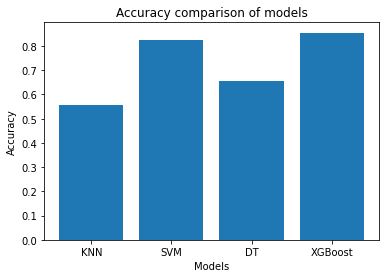

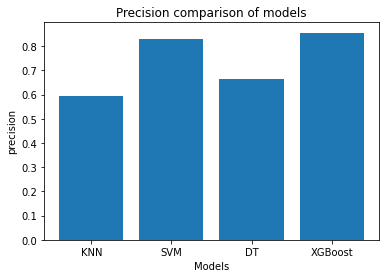

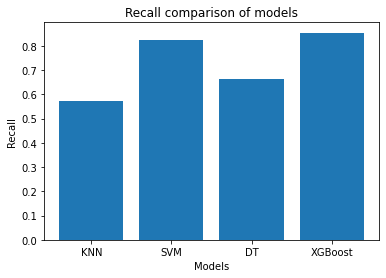

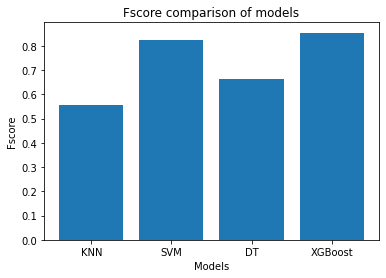

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Convert the text data into a tf-idf representation
vectorizer = CountVectorizer()

bag_of_words = vectorizer.fit_transform(data['Text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, data['Author'], test_size=0.2)


# K-NEAREST NEIGHBOU train and evaluate 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='macro')
knn_recall = recall_score(y_test, knn_pred,average='macro')
knn_fscore = f1_score (y_test, knn_pred,average='macro')

print('knn_accuracy with Bag of Words = ',knn_accuracy)
print('knn_precision with Bag of Words = ',knn_precision)
print('knn_recall with Bag of Words = ',knn_recall)
print('knn_Fscore with Bag of Words = ',knn_fscore)
print("----------------------------------------------------------------")


#DECISION TREE 
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='macro')
dt_recall = recall_score(y_test, dt_pred,average='macro')
dt_fscore = f1_score (y_test, dt_pred,average='macro')

print('dt_accuracy with Bag of Words  = ',dt_accuracy)
print('dt_precision with Bag of Words = ',dt_precision)
print('dt_recall with Bag of Words = ',dt_recall)
print('dt_Fscore with Bag of Words = ',dt_fscore)
print("----------------------------------------------------------------")



# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred,average='macro')
svm_recall = recall_score(y_test, svm_pred,average='macro')
svm_fscore = f1_score (y_test, svm_pred,average='macro')


print('svm_accuracy with Bag of Words = ',svm_accuracy)
print('svm_precision with Bag of Words = ',svm_precision)
print('svm_recall with Bag of Words = ',svm_recall)
print('svm_Fscore with Bag of Words = ',svm_fscore)
print("----------------------------------------------------------------")

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='macro')
xgb_recall = recall_score(y_test, xgb_pred,average='macro')
xgb_fscore = f1_score (y_test, xgb_pred,average='macro')


print('xgb_accuracy with Bag of Words = ',xgb_accuracy)
print('xgb_precision with Bag of Words = ',xgb_precision)
print('xgb_recall with Bag of Words = ',xgb_recall)
print('xgb_Fscore with Bag of Words = ',xgb_fscore)
print("----------------------------------------------------------------")
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# Plot the Precision comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
precisions = [knn_precision, svm_precision,dt_precision, xgb_precision]
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision comparison of models')
plt.show()

# Plot the Recall comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
recalls = [knn_recall, svm_recall,dt_recall, xgb_recall]
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall comparison of models')
plt.show()

# Plot the Fscore comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
fscores = [knn_fscore, svm_fscore,dt_fscore, xgb_fscore]
plt.bar(models, fscores)
plt.xlabel('Models')
plt.ylabel('Fscore')
plt.title('Fscore comparison of models')
plt.show()

# CONFUSION MATRIX AND ERROR ANALYSIS FOR BAG OF WORDS 

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

#SVM ERROR ANALYSIS AND CONFUSION MATRIX 

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
svm_pred = svm.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=svm_pred
df

,Text,actual_data,predicted_data
0,PostOffice is equal to it To grope down into ...,Herman Melville,Herman Melville
1,tricks of the stage No thought I there must...,Herman Melville,Herman Melville
2,but she wanted at once to be the wife of Capta...,Jane Austen,Maria
3,wide intervals in the silvery night the lonel...,Herman Melville,Herman Melville
4,hunted for thousands of years by Semiramis b...,Herman Melville,Herman Melville
...,...,...,...
195,warmly rising in her sister s defence No de...,Maria,Maria
196,stream from the hills Pull pull my good bo...,Herman Melville,Herman Melville
197,in their superstitions declaring Moby Dick no...,Herman Melville,Herman Melville
198,And the Green Carnation withered as in forest...,G. K. Chesterton,John Milton


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the SVM model with Bag Of Words are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), svm_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the SVM model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the SVM model with Bag Of Words are: 35

The confusion matrix for the SVM model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          33      1           0     1       3
Maria            5     39           1     2       1
Chesterton       2      1          26     1       3
Jane             0      1           0    39       0
Milton           7      3           3     0      28
--------------------------------------------------------------------------------------------


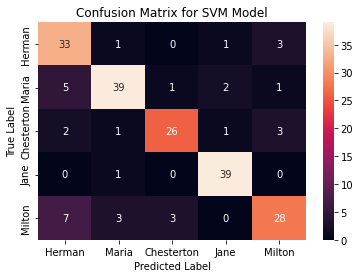

In [ ]:
import seaborn as sns


conf_matrix = confusion_matrix(y_test.to_numpy(), svm_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
sns.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#KNN ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
knn_pred = knn.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=knn_pred
df

,Text,actual_data,predicted_data
0,PostOffice is equal to it To grope down into ...,Herman Melville,John Milton
1,tricks of the stage No thought I there must...,Herman Melville,Maria
2,but she wanted at once to be the wife of Capta...,Jane Austen,Jane Austen
3,wide intervals in the silvery night the lonel...,Herman Melville,Herman Melville
4,hunted for thousands of years by Semiramis b...,Herman Melville,Herman Melville
...,...,...,...
195,warmly rising in her sister s defence No de...,Maria,Jane Austen
196,stream from the hills Pull pull my good bo...,Herman Melville,G. K. Chesterton
197,in their superstitions declaring Moby Dick no...,Herman Melville,Herman Melville
198,And the Green Carnation withered as in forest...,G. K. Chesterton,G. K. Chesterton


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the KNN model with Bag Of Words are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), knn_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the KNN model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")



The number of wrong predictions made by the KNN model with Bag Of Words are: 89

The confusion matrix for the KNN model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          31      0           2     0       5
Maria           21     18           3     3       3
Chesterton       4      4          23     0       2
Jane             7      2           3    27       1
Milton          13      6           9     1      12
--------------------------------------------------------------------------------------------


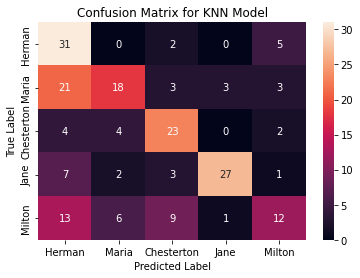

In [ ]:
conf_matrix = confusion_matrix(y_test.to_numpy(), knn_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
sns.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix for KNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Decision Tree ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
dt_pred = dt.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=dt_pred
df

,Text,actual_data,predicted_data
0,PostOffice is equal to it To grope down into ...,Herman Melville,Herman Melville
1,tricks of the stage No thought I there must...,Herman Melville,Herman Melville
2,but she wanted at once to be the wife of Capta...,Jane Austen,Jane Austen
3,wide intervals in the silvery night the lonel...,Herman Melville,Herman Melville
4,hunted for thousands of years by Semiramis b...,Herman Melville,Herman Melville
...,...,...,...
195,warmly rising in her sister s defence No de...,Maria,Maria
196,stream from the hills Pull pull my good bo...,Herman Melville,Maria
197,in their superstitions declaring Moby Dick no...,Herman Melville,G. K. Chesterton
198,And the Green Carnation withered as in forest...,G. K. Chesterton,Herman Melville


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the decision tree model with Bag Of Words are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), dt_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the Decision Tree model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")


The number of wrong predictions made by the decision tree model with Bag Of Words are: 69

The confusion matrix for the Decision Tree model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          25      4           2     0       7
Maria            9     27           0     5       7
Chesterton       1      1          26     1       4
Jane             4      7           1    26       2
Milton           3      4           4     3      27
--------------------------------------------------------------------------------------------


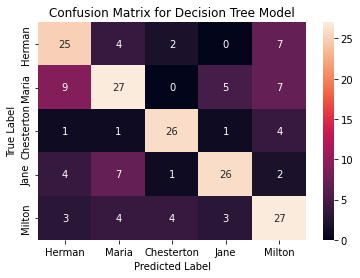

In [ ]:
conf_matrix = confusion_matrix(y_test.to_numpy(), dt_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
sns.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#XGBoost ERROR AND CONFUSION MATRIX 

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
xgb_pred = xgb_model.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=xgb_pred
df

,Text,actual_data,predicted_data
0,PostOffice is equal to it To grope down into ...,Herman Melville,Herman Melville
1,tricks of the stage No thought I there must...,Herman Melville,Herman Melville
2,but she wanted at once to be the wife of Capta...,Jane Austen,Jane Austen
3,wide intervals in the silvery night the lonel...,Herman Melville,Herman Melville
4,hunted for thousands of years by Semiramis b...,Herman Melville,Herman Melville
...,...,...,...
195,warmly rising in her sister s defence No de...,Maria,Maria
196,stream from the hills Pull pull my good bo...,Herman Melville,Herman Melville
197,in their superstitions declaring Moby Dick no...,Herman Melville,John Milton
198,And the Green Carnation withered as in forest...,G. K. Chesterton,John Milton


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the XGBoost model with Bag Of Words are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), xgb_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the XGBoost model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the XGBoost model with Bag Of Words are: 29

The confusion matrix for the XGBoost model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          32      3           0     1       2
Maria            2     40           1     3       2
Chesterton       1      0          27     0       5
Jane             0      1           0    39       0
Milton           2      2           3     1      33
--------------------------------------------------------------------------------------------


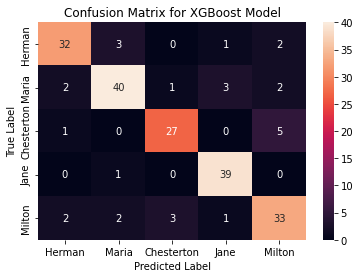

In [ ]:
conf_matrix = confusion_matrix(y_test.to_numpy(), xgb_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
sns.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix for XGBoost Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#10 fold cross validation

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

def ten_fold_cross_validation(model, X, y):
    kf = KFold(n_splits=10)
    accuracy = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        accuracy.append(model.score(X_test, y_test))
    
    return np.array(accuracy)


In [ ]:
print("10 fold validation for SVM \n")
accuracies=ten_fold_cross_validation(svm,bag_of_words,data['Author'])
print(accuracies)
print("Bias and Variability for SVM model is\n")
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

10 fold validation for SVM 

[0.55 0.48 0.37 0.31 0.49 0.51 0.69 0.68 0.88 0.84]
Bias and Variability for SVM model is

Bias: 0.420
Variability: 0.179


In [ ]:
print("10 fold validation for KNN \n")
accuracies=ten_fold_cross_validation(knn,bag_of_words,data['Author'])
print(accuracies)
print("Bias and Variability for KNN model is\n")
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

10 fold validation for KNN 

[0.26 0.25 0.16 0.11 0.51 0.47 0.55 0.65 0.57 0.55]
Bias and Variability for KNN model is

Bias: 0.592
Variability: 0.183


In [ ]:
print("10 fold validation for Decision Tree \n")
accuracies=ten_fold_cross_validation(dt,bag_of_words,data['Author'])
print(accuracies)
print("Bias and Variability for Decision Tree model is\n")
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

10 fold validation for Decision Tree 

[0.4  0.35 0.24 0.33 0.51 0.71 0.63 0.66 0.78 0.71]
Bias and Variability for Decision Tree model is

Bias: 0.468
Variability: 0.181


In [ ]:
print("10 fold validation for XGB \n")
accuracies=ten_fold_cross_validation(xgb_model,bag_of_words,data['Author'])
print(accuracies)
print("Bias and Variability for XGB model is\n")
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

10 fold validation for XGB 

[0.67 0.54 0.48 0.62 0.59 0.74 0.76 0.65 0.89 0.87]
Bias and Variability for XGB model is

Bias: 0.319
Variability: 0.127


# TF-IDF 

knn_accuracy with TF-IDF =  0.805
knn_precision with TF-IDF =  0.8317027417027416
knn_recall with TF-IDF =  0.7990150437518858
knn_Fscore with TF-IDF =  0.7961150323747301
----------------------------------------------------------------
dt_accuracy with TF-IDF  =  0.625
dt_precision with TF-IDF =  0.6236083571838131
dt_recall with TF-IDF =  0.6116475925686452
dt_Fscore with TF-IDF =  0.6130154870334333
----------------------------------------------------------------
svm_accuracy with TF-IDF =  0.935
svm_precision with TF-IDF =  0.9354978354978355
svm_recall with TF-IDF =  0.9397102245786456
svm_Fscore with TF-IDF =  0.9344676137190323
----------------------------------------------------------------
xgb_accuracy with TF-IDF =  0.82
xgb_precision with TF-IDF =  0.8237740934211523
xgb_recall with TF-IDF =  0.8163633130738394
xgb_Fscore with TF-IDF =  0.8188088737236526
----------------------------------------------------------------


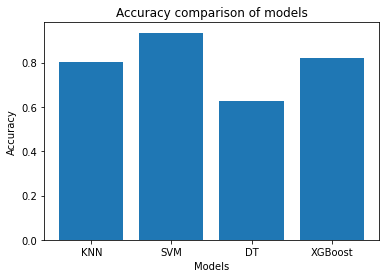

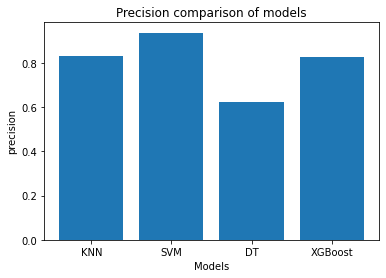

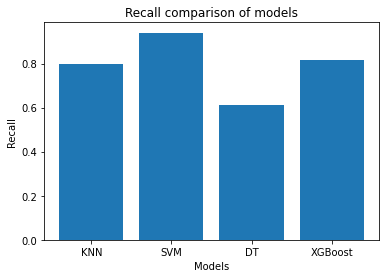

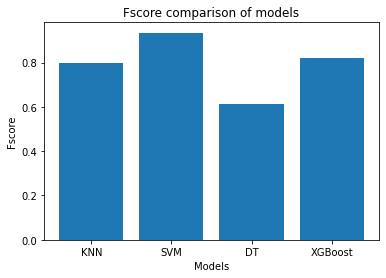

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the csv file
#df = pd.read_csv('book_partitions.csv')

# Convert the text data into a tf-idf representation
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['Text'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, data['Author'], test_size=0.2, random_state=42)

# K-NEAREST NEIGHBOUR 
# Train and evaluate the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='macro')
knn_recall = recall_score(y_test, knn_pred,average='macro')
knn_fscore = f1_score (y_test, knn_pred,average='macro')

print('knn_accuracy with TF-IDF = ',knn_accuracy)
print('knn_precision with TF-IDF = ',knn_precision)
print('knn_recall with TF-IDF = ',knn_recall)
print('knn_Fscore with TF-IDF = ',knn_fscore)
print("----------------------------------------------------------------")


#DECISION TREE 
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='macro')
dt_recall = recall_score(y_test, dt_pred,average='macro')
dt_fscore = f1_score (y_test, dt_pred,average='macro')

print('dt_accuracy with TF-IDF  = ',dt_accuracy)
print('dt_precision with TF-IDF = ',dt_precision)
print('dt_recall with TF-IDF = ',dt_recall)
print('dt_Fscore with TF-IDF = ',dt_fscore)
print("----------------------------------------------------------------")



# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred,average='macro')
svm_recall = recall_score(y_test, svm_pred,average='macro')
svm_fscore = f1_score (y_test, svm_pred,average='macro')


print('svm_accuracy with TF-IDF = ',svm_accuracy)
print('svm_precision with TF-IDF = ',svm_precision)
print('svm_recall with TF-IDF = ',svm_recall)
print('svm_Fscore with TF-IDF = ',svm_fscore)
print("----------------------------------------------------------------")

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='macro')
xgb_recall = recall_score(y_test, xgb_pred,average='macro')
xgb_fscore = f1_score (y_test, xgb_pred,average='macro')


print('xgb_accuracy with TF-IDF = ',xgb_accuracy)
print('xgb_precision with TF-IDF = ',xgb_precision)
print('xgb_recall with TF-IDF = ',xgb_recall)
print('xgb_Fscore with TF-IDF = ',xgb_fscore)
print("----------------------------------------------------------------")
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# Plot the Precision comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
precisions = [knn_precision, svm_precision,dt_precision, xgb_precision]
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision comparison of models')
plt.show()

# Plot the Recall comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
recalls = [knn_recall, svm_recall,dt_recall, xgb_recall]
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall comparison of models')
plt.show()

# Plot the Fscore comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
fscores = [knn_fscore, svm_fscore,dt_fscore, xgb_fscore]
plt.bar(models, fscores)
plt.xlabel('Models')
plt.ylabel('Fscore')
plt.title('Fscore comparison of models')
plt.show()

#CONFUSION MATRIX AND ERROR ANALYSIS FOR TF-IDF

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# SVM ERROR ANALYSIS AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
svm_pred = svm.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=svm_pred
df

,Text,actual_data,predicted_data
0,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
1,or Mr Knightley particularly delighted They w...,Jane Austen,Jane Austen
2,in his face I do not know which it ought to ...,Jane Austen,Jane Austen
3,journey Yes upon my word very considerabl...,Jane Austen,Jane Austen
4,would be a new emotion to get a knife into a F...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,forts of sand were even as weak as eve High a...,G. K. Chesterton,G. K. Chesterton
196,Lucy But let the old man then come in here...,Maria,Maria
197,from us so long Patty 2nd Peasant Please y...,Maria,Maria
198,horse Seats tolerably in the shade were found...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the SVM model with TF-IDF are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), svm_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the SVM model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the SVM model with TF-IDF are: 13

The confusion matrix for the SVM model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          36      1           0     0       0
Maria            2     31           0     0       0
Chesterton       1      0          37     0       0
Jane             0      0           0    44       0
Milton           3      1           5     0      39
--------------------------------------------------------------------------------------------


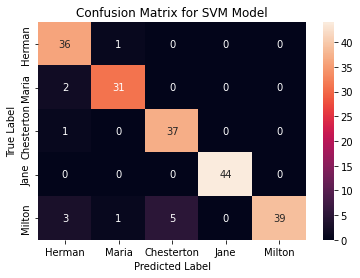

In [ ]:
sns.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# KNN ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
knn_pred = knn.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=knn_pred
df

,Text,actual_data,predicted_data
0,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
1,or Mr Knightley particularly delighted They w...,Jane Austen,Jane Austen
2,in his face I do not know which it ought to ...,Jane Austen,Jane Austen
3,journey Yes upon my word very considerabl...,Jane Austen,Jane Austen
4,would be a new emotion to get a knife into a F...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,forts of sand were even as weak as eve High a...,G. K. Chesterton,G. K. Chesterton
196,Lucy But let the old man then come in here...,Maria,Maria
197,from us so long Patty 2nd Peasant Please y...,Maria,Maria
198,horse Seats tolerably in the shade were found...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the KNN model with TF-IDF are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), knn_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the KNN model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")


The number of wrong predictions made by the KNN model with TF-IDF are: 39

The confusion matrix for the KNN model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          34      0           1     0       2
Maria            4     17           5     2       5
Chesterton       0      0          36     0       2
Jane             2      1           3    38       0
Milton           2      0          10     0      36
--------------------------------------------------------------------------------------------


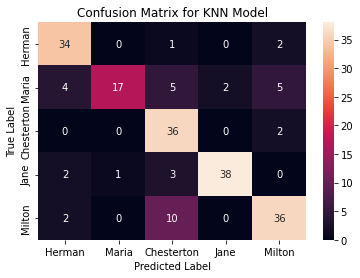

In [ ]:
sns.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix for KNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Decision Tree ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
dt_pred = dt.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=dt_pred
df

,Text,actual_data,predicted_data
0,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
1,or Mr Knightley particularly delighted They w...,Jane Austen,Jane Austen
2,in his face I do not know which it ought to ...,Jane Austen,Jane Austen
3,journey Yes upon my word very considerabl...,Jane Austen,Maria
4,would be a new emotion to get a knife into a F...,G. K. Chesterton,Herman Melville
...,...,...,...
195,forts of sand were even as weak as eve High a...,G. K. Chesterton,John Milton
196,Lucy But let the old man then come in here...,Maria,Maria
197,from us so long Patty 2nd Peasant Please y...,Maria,Jane Austen
198,horse Seats tolerably in the shade were found...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the decision tree model with TF-IDF are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), dt_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the Decision Tree model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the decision tree model with TF-IDF are: 75

The confusion matrix for the Decision Tree model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          24      1           1     2       9
Maria            6     10           2     4      11
Chesterton       1      0          26     0      11
Jane             1      5           1    36       1
Milton           4      6           8     1      29
--------------------------------------------------------------------------------------------


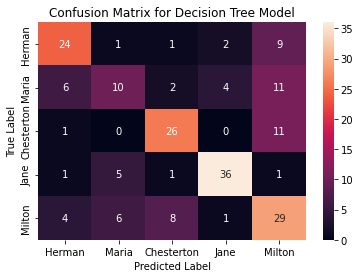

In [ ]:
sns.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# XGBoost ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
xgb_pred = xgb_model.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=xgb_pred
df

,Text,actual_data,predicted_data
0,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
1,or Mr Knightley particularly delighted They w...,Jane Austen,Jane Austen
2,in his face I do not know which it ought to ...,Jane Austen,Jane Austen
3,journey Yes upon my word very considerabl...,Jane Austen,Jane Austen
4,would be a new emotion to get a knife into a F...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,forts of sand were even as weak as eve High a...,G. K. Chesterton,John Milton
196,Lucy But let the old man then come in here...,Maria,Maria
197,from us so long Patty 2nd Peasant Please y...,Maria,G. K. Chesterton
198,horse Seats tolerably in the shade were found...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the XGBoost model with TF-IDF are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), xgb_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the XGBoost model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the XGBoost model with TF-IDF are: 36

The confusion matrix for the XGBoost model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          28      1           0     3       5
Maria            1     25           0     4       3
Chesterton       1      1          32     0       4
Jane             0      1           0    42       1
Milton           4      2           5     0      37
--------------------------------------------------------------------------------------------


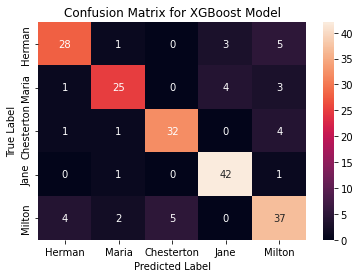

In [ ]:
sns.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix for XGBoost Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 10 Fold Cross Validation

In [ ]:
print("10 fold validation for SVM \n")
accuracies=ten_fold_cross_validation(svm,tfidf,data['Author'])
print(accuracies)
print("Bias and Variability for SVM model is\n")
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

10 fold validation for SVM 

[0.44 0.37 0.35 0.34 0.38 0.41 0.68 0.53 0.75 0.7 ]
Bias and Variability for SVM model is

Bias: 0.505
Variability: 0.151


In [ ]:
print("10 fold validation for KNN \n")
accuracies=ten_fold_cross_validation(knn,tfidf,data['Author'])
print(accuracies)
print("Bias and Variability for KNN model is\n")
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

10 fold validation for KNN 

[0.45 0.43 0.5  0.54 0.69 0.73 0.91 0.73 0.71 0.72]
Bias and Variability for KNN model is

Bias: 0.359
Variability: 0.146


In [ ]:
print("10 fold validation for Decision Tree \n")
accuracies=ten_fold_cross_validation(dt,tfidf,data['Author'])
print(accuracies)
print("Bias and Variability for Decision Tree model is\n")
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

10 fold validation for Decision Tree 

[0.38 0.36 0.31 0.33 0.56 0.67 0.66 0.56 0.66 0.62]
Bias and Variability for Decision Tree model is

Bias: 0.489
Variability: 0.141


In [ ]:
print("10 fold validation for XGB \n")
accuracies=ten_fold_cross_validation(xgb_model,tfidf,data['Author'])
print(accuracies)
print("Bias and Variability for XGB model is\n")
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

10 fold validation for XGB 

[0.66 0.54 0.37 0.5  0.58 0.73 0.79 0.61 0.86 0.81]
Bias and Variability for XGB model is

Bias: 0.355
Variability: 0.147


# N-GRAM


knn_accuracy with N-GRAM =  0.565
knn_precision with N-GRAM =  0.5767837228771345
knn_recall with N-GRAM =  0.5654090693564378
knn_Fscore with N-GRAM =  0.5433391780799649
----------------------------------------------------------------
dt_accuracy with N-GRAM  =  0.61
dt_precision with N-GRAM =  0.6012408424908425
dt_recall with N-GRAM =  0.6033767619293935
dt_Fscore with N-GRAM =  0.6016105400961476
----------------------------------------------------------------
svm_accuracy with N-GRAM =  0.82
svm_precision with N-GRAM =  0.8178354978354978
svm_recall with N-GRAM =  0.8283956205008837
svm_Fscore with N-GRAM =  0.8163144127852959
----------------------------------------------------------------
xgb_accuracy with N-GRAM =  0.87
xgb_precision with N-GRAM =  0.8735596678862934
xgb_recall with N-GRAM =  0.8649731669468512
xgb_Fscore with N-GRAM =  0.8673412698412699
----------------------------------------------------------------


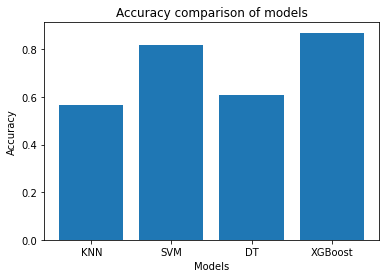

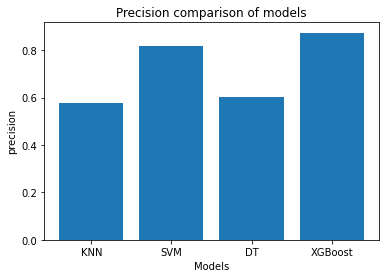

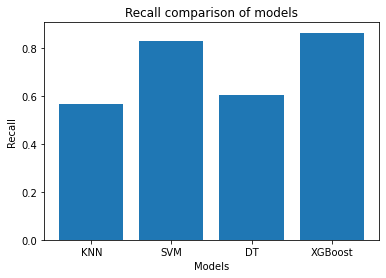

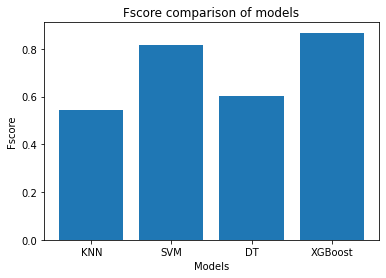

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the csv file
#df = pd.read_csv('book_partitions3.csv')

# Convert the text data into a n-gram representation
vectorizer = CountVectorizer(ngram_range=(1, 2))
ngrams = vectorizer.fit_transform(data['Text'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ngrams, data['Author'], test_size=0.2, random_state=42)

# K-NEAREST NEIGHBOUR 
# Train and evaluate the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='macro')
knn_recall = recall_score(y_test, knn_pred,average='macro')
knn_fscore = f1_score (y_test, knn_pred,average='macro')

print('knn_accuracy with N-GRAM = ',knn_accuracy)
print('knn_precision with N-GRAM = ',knn_precision)
print('knn_recall with N-GRAM = ',knn_recall)
print('knn_Fscore with N-GRAM = ',knn_fscore)
print("----------------------------------------------------------------")


#DECISION TREE 
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='macro')
dt_recall = recall_score(y_test, dt_pred,average='macro')
dt_fscore = f1_score (y_test, dt_pred,average='macro')

print('dt_accuracy with N-GRAM  = ',dt_accuracy)
print('dt_precision with N-GRAM = ',dt_precision)
print('dt_recall with N-GRAM = ',dt_recall)
print('dt_Fscore with N-GRAM = ',dt_fscore)
print("----------------------------------------------------------------")



# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred,average='macro')
svm_recall = recall_score(y_test, svm_pred,average='macro')
svm_fscore = f1_score (y_test, svm_pred,average='macro')


print('svm_accuracy with N-GRAM = ',svm_accuracy)
print('svm_precision with N-GRAM = ',svm_precision)
print('svm_recall with N-GRAM = ',svm_recall)
print('svm_Fscore with N-GRAM = ',svm_fscore)
print("----------------------------------------------------------------")

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='macro')
xgb_recall = recall_score(y_test, xgb_pred,average='macro')
xgb_fscore = f1_score (y_test, xgb_pred,average='macro')


print('xgb_accuracy with N-GRAM = ',xgb_accuracy)
print('xgb_precision with N-GRAM = ',xgb_precision)
print('xgb_recall with N-GRAM = ',xgb_recall)
print('xgb_Fscore with N-GRAM = ',xgb_fscore)
print("----------------------------------------------------------------")
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# Plot the Precision comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
precisions = [knn_precision, svm_precision,dt_precision, xgb_precision]
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision comparison of models')
plt.show()

# Plot the Recall comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
recalls = [knn_recall, svm_recall,dt_recall, xgb_recall]
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall comparison of models')
plt.show()

# Plot the Fscore comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
fscores = [knn_fscore, svm_fscore,dt_fscore, xgb_fscore]
plt.bar(models, fscores)
plt.xlabel('Models')
plt.ylabel('Fscore')
plt.title('Fscore comparison of models')
plt.show()

# CONFUSION MATRIX AND ERROR ANALYSIS FOR N-GRAM

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# SVM ERROR ANALYSIS AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
svm_pred = svm.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=svm_pred
df

,Text,actual_data,predicted_data
0,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
1,or Mr Knightley particularly delighted They w...,Jane Austen,Jane Austen
2,in his face I do not know which it ought to ...,Jane Austen,Jane Austen
3,journey Yes upon my word very considerabl...,Jane Austen,Jane Austen
4,would be a new emotion to get a knife into a F...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,forts of sand were even as weak as eve High a...,G. K. Chesterton,G. K. Chesterton
196,Lucy But let the old man then come in here...,Maria,G. K. Chesterton
197,from us so long Patty 2nd Peasant Please y...,Maria,Maria
198,horse Seats tolerably in the shade were found...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the SVM model with N-GRAM are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), svm_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the SVM model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the SVM model with N-GRAM are: 36

The confusion matrix for the SVM model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          32      3           0     0       2
Maria            2     27           0     3       1
Chesterton       0      1          35     0       2
Jane             1      1           0    42       0
Milton           7      4           9     0      28
--------------------------------------------------------------------------------------------


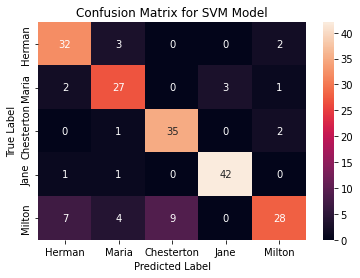

In [ ]:
sns.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# KNN ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
knn_pred = knn.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=knn_pred
df

,Text,actual_data,predicted_data
0,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
1,or Mr Knightley particularly delighted They w...,Jane Austen,Jane Austen
2,in his face I do not know which it ought to ...,Jane Austen,Jane Austen
3,journey Yes upon my word very considerabl...,Jane Austen,Jane Austen
4,would be a new emotion to get a knife into a F...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,forts of sand were even as weak as eve High a...,G. K. Chesterton,G. K. Chesterton
196,Lucy But let the old man then come in here...,Maria,Maria
197,from us so long Patty 2nd Peasant Please y...,Maria,Maria
198,horse Seats tolerably in the shade were found...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the KNN model with N-GRAM are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), knn_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the KNN model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the KNN model with N-GRAM are: 87

The confusion matrix for the KNN model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          29      2           2     2       2
Maria           12      8           3     5       5
Chesterton       3      0          30     0       5
Jane             8      3           0    28       5
Milton           9      1          18     2      18
--------------------------------------------------------------------------------------------


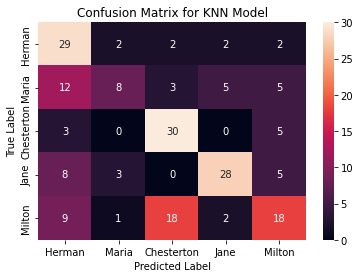

In [ ]:
sns.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix for KNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Decision Tree ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
dt_pred = dt.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=dt_pred
df

,Text,actual_data,predicted_data
0,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
1,or Mr Knightley particularly delighted They w...,Jane Austen,Jane Austen
2,in his face I do not know which it ought to ...,Jane Austen,Jane Austen
3,journey Yes upon my word very considerabl...,Jane Austen,Jane Austen
4,would be a new emotion to get a knife into a F...,G. K. Chesterton,Maria
...,...,...,...
195,forts of sand were even as weak as eve High a...,G. K. Chesterton,G. K. Chesterton
196,Lucy But let the old man then come in here...,Maria,Herman Melville
197,from us so long Patty 2nd Peasant Please y...,Maria,Herman Melville
198,horse Seats tolerably in the shade were found...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the decision tree model with N-GRAM are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), dt_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the Decision Tree model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the decision tree model with N-GRAM are: 78

The confusion matrix for the Decision Tree model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          25      4           1     2       5
Maria            3     11           1    10       8
Chesterton       2      0          27     0       9
Jane             1      5           1    36       1
Milton           8     12           5     0      23
--------------------------------------------------------------------------------------------


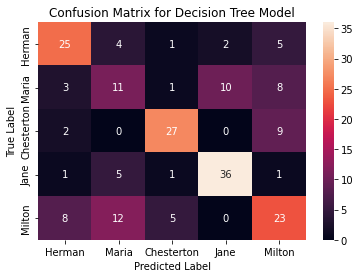

In [ ]:
sns.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# XGBoost ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
xgb_pred = xgb_model.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=xgb_pred
df

,Text,actual_data,predicted_data
0,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
1,or Mr Knightley particularly delighted They w...,Jane Austen,Jane Austen
2,in his face I do not know which it ought to ...,Jane Austen,Jane Austen
3,journey Yes upon my word very considerabl...,Jane Austen,Jane Austen
4,would be a new emotion to get a knife into a F...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,forts of sand were even as weak as eve High a...,G. K. Chesterton,Herman Melville
196,Lucy But let the old man then come in here...,Maria,Maria
197,from us so long Patty 2nd Peasant Please y...,Maria,Herman Melville
198,horse Seats tolerably in the shade were found...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the XGBoost model with N-GRAM are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), xgb_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the XGBoost model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the XGBoost model with N-GRAM are: 26

The confusion matrix for the XGBoost model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          30      2           0     2       3
Maria            0     26           0     6       1
Chesterton       1      0          34     0       3
Jane             0      1           0    43       0
Milton           2      1           4     0      41
--------------------------------------------------------------------------------------------


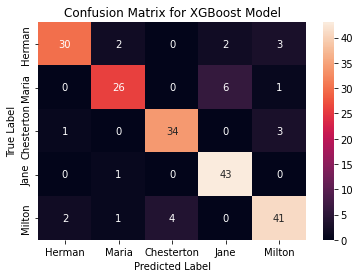

In [ ]:
sns.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix for XGBoost Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 10 Fold cross validation

In [ ]:
print("10 fold validation for SVM \n")
accuracies=ten_fold_cross_validation(svm,ngrams,data['Author'])
print(accuracies)
print("Bias and Variability for SVM model is\n")
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

10 fold validation for SVM 

[0.36 0.32 0.17 0.17 0.32 0.35 0.58 0.47 0.82 0.75]
Bias and Variability for SVM model is

Bias: 0.569
Variability: 0.212


In [ ]:
print("10 fold validation for KNN \n")
accuracies=ten_fold_cross_validation(knn,ngrams,data['Author'])
print(accuracies)
print("Bias and Variability for KNN model is\n")
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

10 fold validation for KNN 

[0.15 0.15 0.2  0.1  0.52 0.38 0.5  0.6  0.33 0.37]
Bias and Variability for KNN model is

Bias: 0.670
Variability: 0.166


In [ ]:
print("10 fold validation for Decision Tree \n")
accuracies=ten_fold_cross_validation(dt,ngrams,data['Author'])
print(accuracies)
print("Bias and Variability for Decision Tree model is\n")
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

10 fold validation for Decision Tree 

[0.41 0.46 0.38 0.33 0.51 0.66 0.63 0.61 0.75 0.75]
Bias and Variability for Decision Tree model is

Bias: 0.451
Variability: 0.144


In [ ]:
print("10 fold validation for XGB \n")
accuracies=ten_fold_cross_validation(xgb_model,ngrams,data['Author'])
print(accuracies)
print("Bias and Variability for XGB model is\n")
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

10 fold validation for XGB 

[0.68 0.58 0.49 0.62 0.58 0.76 0.77 0.66 0.92 0.87]
Bias and Variability for XGB model is

Bias: 0.307
Variability: 0.129


# CHAMPION MODEL = SVM WITH TF-IDF AVERAGING AN ACCURACY OF 0.94

# 10 FOLD COSS VALIDATION FOR CHAMPION MODEL 


In [ ]:
import numpy as np
from sklearn.model_selection import KFold

def ten_fold_cross_validation(model, X, y):
    kf = KFold(n_splits=10)
    accuracy = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        accuracy.append(model.score(X_test, y_test))
    
    return np.array(accuracy)


In [ ]:
print("10 fold validation for SVM ")
ten_fold_cross_validation(svm,tfidf,data['Author'])

10 fold validation for SVM 


array([0.44, 0.37, 0.35, 0.34, 0.38, 0.41, 0.68, 0.53, 0.75, 0.7 ])

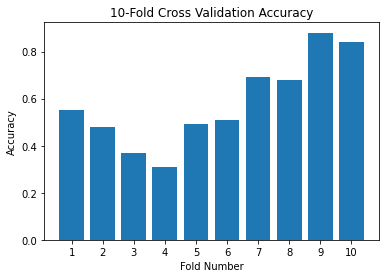

In [ ]:
accuracy = ten_fold_cross_validation(svm,bag_of_words,data['Author'])

plt.bar(range(1, 11), accuracy, align='center')
plt.xticks(range(1, 11))
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('10-Fold Cross Validation Accuracy')
plt.show()

BIAS AND VARIABILITY 

In [ ]:
bias = 1-np.mean(accuracies)
variability = np.std(accuracies)

print("Bias: {:.3f}".format(bias))
print("Variability: {:.3f}".format(variability))

Bias: 0.307
Variability: 0.129


# LOWERING THE ACCURACY 

the accuracy of the champion model has been lowered to 0.69 which is approx 20% 

knn_accuracy with TF-IDF =  0.65875
knn_precision with TF-IDF =  0.65875
knn_recall with TF-IDF =  0.65875
knn_Fscore with TF-IDF =  0.65875
----------------------------------------------------------------
dt_accuracy with TF-IDF  =  0.46625
dt_precision with TF-IDF =  0.46625
dt_recall with TF-IDF =  0.46625
dt_Fscore with TF-IDF =  0.46625
----------------------------------------------------------------
svm_accuracy with TF-IDF =  0.67625
svm_precision with TF-IDF =  0.67625
svm_recall with TF-IDF =  0.67625
svm_Fscore with TF-IDF =  0.67625
----------------------------------------------------------------
xgb_accuracy with TF-IDF =  0.6475
xgb_precision with TF-IDF =  0.6475
xgb_recall with TF-IDF =  0.6475
xgb_Fscore with TF-IDF =  0.6475
----------------------------------------------------------------


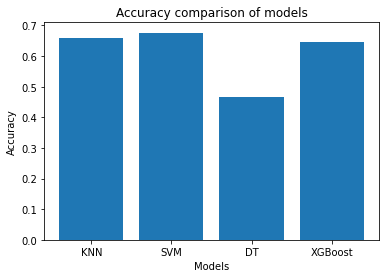

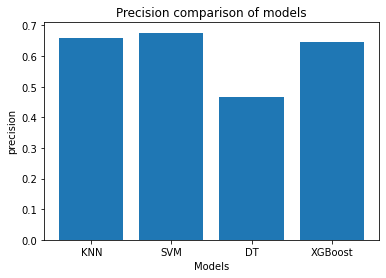

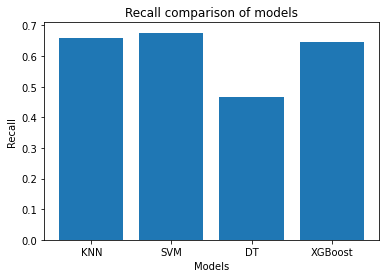

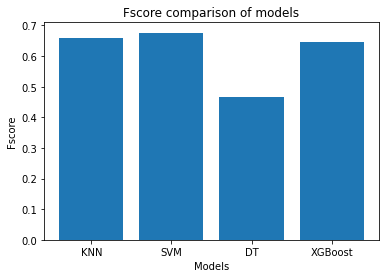

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the csv file
#df = pd.read_csv('book_partitions.csv')

# Convert the text data into a tf-idf representation
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['Text'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, data['Author'], test_size=0.8, random_state=42)

# K-NEAREST NEIGHBOUR 
# Train and evaluate the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='micro')
knn_recall = recall_score(y_test, knn_pred,average='micro')
knn_fscore = f1_score (y_test, knn_pred,average='micro')

print('knn_accuracy with TF-IDF = ',knn_accuracy)
print('knn_precision with TF-IDF = ',knn_precision)
print('knn_recall with TF-IDF = ',knn_recall)
print('knn_Fscore with TF-IDF = ',knn_fscore)
print("----------------------------------------------------------------")


#DECISION TREE 
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='micro')
dt_recall = recall_score(y_test, dt_pred,average='micro')
dt_fscore = f1_score (y_test, dt_pred,average='micro')

print('dt_accuracy with TF-IDF  = ',dt_accuracy)
print('dt_precision with TF-IDF = ',dt_precision)
print('dt_recall with TF-IDF = ',dt_recall)
print('dt_Fscore with TF-IDF = ',dt_fscore)
print("----------------------------------------------------------------")



# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred,average='micro')
svm_recall = recall_score(y_test, svm_pred,average='micro')
svm_fscore = f1_score (y_test, svm_pred,average='micro')


print('svm_accuracy with TF-IDF = ',svm_accuracy)
print('svm_precision with TF-IDF = ',svm_precision)
print('svm_recall with TF-IDF = ',svm_recall)
print('svm_Fscore with TF-IDF = ',svm_fscore)
print("----------------------------------------------------------------")

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='micro')
xgb_recall = recall_score(y_test, xgb_pred,average='micro')
xgb_fscore = f1_score (y_test, xgb_pred,average='micro')


print('xgb_accuracy with TF-IDF = ',xgb_accuracy)
print('xgb_precision with TF-IDF = ',xgb_precision)
print('xgb_recall with TF-IDF = ',xgb_recall)
print('xgb_Fscore with TF-IDF = ',xgb_fscore)
print("----------------------------------------------------------------")
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# Plot the Precision comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
precisions = [knn_precision, svm_precision,dt_precision, xgb_precision]
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision comparison of models')
plt.show()

# Plot the Recall comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
recalls = [knn_recall, svm_recall,dt_recall, xgb_recall]
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall comparison of models')
plt.show()

# Plot the Fscore comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
fscores = [knn_fscore, svm_fscore,dt_fscore, xgb_fscore]
plt.bar(models, fscores)
plt.xlabel('Models')
plt.ylabel('Fscore')
plt.title('Fscore comparison of models')
plt.show()